In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd

# Load the cleaned CSV
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\aqi_data.csv")

# Preview the first rows
df.head()
# Save as Pickle


,state,city,station,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,...,Predominant_Parameter,datetime,year,month,day,weekday,hour,temperature,altitude,humidity
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",68,64,17,4,28,31,40,...,PM2.5,2020-01-03 10:00:00,2020,1,3,Friday,10,26,76,52
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",67,70,23,2,13,49,77,...,OZONE,2020-01-03 10:00:00,2020,1,3,Friday,10,39,115,54
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",32,64,26,5,6,19,16,...,PM2.5,2020-01-03 10:00:00,2020,1,3,Friday,10,34,153,88
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",93,93,31,3,9,57,61,...,PM10,2020-01-03 10:00:00,2020,1,3,Friday,10,30,405,79
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",60,55,20,5,18,29,53,...,PM2.5,2020-01-05 06:00:00,2020,1,5,Sunday,6,27,102,72


In [5]:
df.values

array([['Andhra_Pradesh', 'Amaravati', 'Secretariat, Amaravati - APPCB',
        ..., 26, 76, 52],
       ['Andhra_Pradesh', 'Rajamahendravaram',
        'Anand Kala Kshetram, Rajamahendravaram - APPCB', ..., 39, 115,
        54],
       ['Andhra_Pradesh', 'Tirupati', 'Tirumala, Tirupati - APPCB', ...,
        34, 153, 88],
       ...,
       ['West_Bengal', 'Kolkata', 'Rabindra Sarobar, Kolkata - WBPCB',
        ..., 28, 261, 67],
       ['West_Bengal', 'Kolkata', 'Victoria, Kolkata - WBPCB', ..., 32,
        166, 80],
       ['West_Bengal', 'Siliguri', 'Ward-32 Bapupara, Siliguri - WBPCB',
        ..., 20, 435, 65]], dtype=object)

In [19]:
# Resample AQI by hour using mean
df_target = df[['datetime', 'AQI']].copy()
df_target['datetime'] = pd.to_datetime(df_target['datetime'])
df_target = df_target.set_index('datetime')
df_aqi_resample = df_target.resample('h').mean()  # compute hourly mean AQI

# Merge with numeric resampled data
df_resample['AQI'] = df_aqi_resample['AQI']

# Drop any remaining NaN in AQI
df_resample = df_resample.dropna(subset=['AQI'])

df_resample.head()


,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,temperature,humidity,altitude,AQI
datetime,,,,,,,,,,,
2020-01-03 10:00:00,190.481865,159.181347,47.497409,9.150259,16.020725,58.632124,31.331606,29.264249,61.202073,239.932642,195.373057
2020-01-05 06:00:00,196.312500,156.135417,46.520833,8.708333,15.859375,42.593750,42.645833,29.239583,58.411458,247.281250,202.322917
2020-01-06 03:00:00,185.979592,151.168367,46.872449,8.525510,16.270408,52.056122,28.954082,28.642857,59.316327,257.163265,192.433673
2020-01-06 06:00:00,188.505102,152.209184,47.530612,8.602041,16.535714,49.857143,33.938776,29.086735,59.704082,248.040816,195.096939
2020-01-06 11:00:00,182.543147,146.629442,47.335025,8.517766,16.639594,53.451777,27.741117,29.827411,60.573604,220.741117,189.426396


In [20]:
X=df.drop("AQI",axis=1)
Y=df["AQI"]
n=df.shape[0]
n=int (n*0.65)
train_x=X[:n-1]
test_x=X[n-1:-1]
train_y=Y[1:n]
test_y=Y[n:]
train_y=train_y.astype(int)
test_y=test_y.astype(int)

In [21]:
print(train_x.columns)


Index(['state', 'city', 'station', 'PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO',
       'OZONE', 'Predominant_Parameter', 'datetime', 'year', 'month', 'day',
       'weekday', 'hour', 'temperature', 'altitude', 'humidity'],
      dtype='object')


### Logistic Regression

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# 1️⃣ Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'])

# 2️⃣ Select numeric columns
numeric_cols = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE',
                'temperature', 'humidity', 'altitude']

df_numeric = df[numeric_cols + ['datetime']].copy()
df_numeric = df_numeric.set_index('datetime')

# 3️⃣ Resample numeric columns hourly
df_resample = df_numeric.resample('h').mean()

# 4️⃣ Drop rows with more than 3 NaNs
mask = df_resample.isna().sum(axis=1) > 3
df_resample = df_resample.drop(index=df_resample[mask].index)

# 5️⃣ Resample AQI hourly
df_aqi = df[['datetime', 'AQI']].copy()
df_aqi['datetime'] = pd.to_datetime(df_aqi['datetime'])
df_aqi = df_aqi.set_index('datetime')
df_aqi_resample = df_aqi.resample('h').mean()

# 6️⃣ Merge AQI with numeric features
df_resample['AQI'] = df_aqi_resample['AQI']

# 7️⃣ Drop rows with NaN in AQI
df_resample = df_resample.dropna(subset=['AQI'])

# 8️⃣ Train/test split (65% train)
n = int(len(df_resample) * 0.65)
train_x = df_resample.drop('AQI', axis=1)[:n]
train_y = df_resample['AQI'][:n].astype(int)
test_x = df_resample.drop('AQI', axis=1)[n:]
test_y = df_resample['AQI'][n:].astype(int)

# 9️⃣ Identify categorical columns present in your original df
categorical_features = ['state', 'city', 'station', 'Predominant_Parameter', 
                        'year', 'month', 'day', 'weekday', 'hour']

# Make sure categorical columns exist in train_x/test_x
categorical_features = [col for col in categorical_features if col in train_x.columns]

# 10️⃣ Build preprocessing and pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000))
])

# 11️⃣ Fit model
model.fit(train_x, train_y)

# 12️⃣ Predict and check accuracy
p = model.predict(test_x)
acc_log_train = round(model.score(train_x, train_y) * 100, 2)
acc_log_test = round(model.score(test_x, test_y) * 100, 2)

print("Train Accuracy:", acc_log_train)
print("Test Accuracy:", acc_log_test)


Train Accuracy: 100.0
Test Accuracy: 0.0


In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ Convert datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# 2️⃣ Numeric columns
numeric_cols = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE',
                'temperature', 'humidity', 'altitude']

# 3️⃣ Resample numeric columns hourly
df_numeric = df[numeric_cols + ['datetime']].copy()
df_numeric = df_numeric.set_index('datetime')
df_resample = df_numeric.resample('h').mean()

# 4️⃣ Drop rows with more than 3 NaNs
mask = df_resample.isna().sum(axis=1) > 3
df_resample = df_resample.drop(index=df_resample[mask].index)

# 5️⃣ Resample AQI hourly
df_aqi = df[['datetime', 'AQI']].copy()
df_aqi['datetime'] = pd.to_datetime(df_aqi['datetime'])
df_aqi = df_aqi.set_index('datetime')
df_aqi_resample = df_aqi.resample('h').mean()

# 6️⃣ Merge AQI
df_resample['AQI'] = df_aqi_resample['AQI']

# 7️⃣ Drop remaining NaNs in AQI
df_resample = df_resample.dropna(subset=['AQI'])

# 8️⃣ Optional: categorical columns (keep only if necessary)
categorical_features = ['state', 'Predominant_Parameter']
categorical_features = [col for col in categorical_features if col in df_resample.columns]

# 9️⃣ Train/test split (65% train)
n = int(len(df_resample) * 0.65)
train_x = df_resample.drop('AQI', axis=1)[:n]
train_y = df_resample['AQI'][:n]
test_x = df_resample.drop('AQI', axis=1)[n:]
test_y = df_resample['AQI'][n:]

# 10️⃣ Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 11️⃣ Pipeline with Linear Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 12️⃣ Fit model
model.fit(train_x, train_y)

# 13️⃣ Predict
pred_y = model.predict(test_x)

# 14️⃣ Evaluate
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

print("Test MSE:", round(mse, 2))
print("Test R^2:", round(r2, 2))


Test MSE: 52.64
Test R^2: 0.14


### KNN

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(train_x,train_y)  
Y_pred = knn.predict(test_x)  
acc_knn = round(knn.score(train_x,train_y) * 100, 2)  
acc_knnP = round(knn.score(test_x,test_y) * 100, 2)
Y_pred

array([195, 189, 195])

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model
random_forest.fit(train_x, train_y)

# Predict
Y_prediction = random_forest.predict(test_x)

# Evaluate
mse = mean_squared_error(test_y, Y_prediction)
r2 = r2_score(test_y, Y_prediction)

print("Test MSE:", round(mse, 2))
print("Test R^2:", round(r2, 2))


Test MSE: 285.21
Test R^2: -3.66


### Decision Tree

In [30]:
# decision_tree = DecisionTreeClassifier() 
# decision_tree.fit(train_x,train_y)  
# Y_pred2 = decision_tree.predict(test_x)  
# acc_decision_tree = round(decision_tree.score(train_x,train_y) * 100, 2)  
# acc_decision_treeP = round(decision_tree.score(test_x,test_y) * 100, 2)
# Y_pred2 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create model
decision_tree = DecisionTreeRegressor(random_state=42)

# Fit model
decision_tree.fit(train_x, train_y)

# Predict
Y_pred2 = decision_tree.predict(test_x)

# Evaluate
mse = mean_squared_error(test_y, Y_pred2)
r2 = r2_score(test_y, Y_pred2)

print("Test MSE:", round(mse, 2))
print("Test R^2:", round(r2, 2))


Test MSE: 198.68
Test R^2: -2.25


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer

# 1️⃣ Discretize AQI into categories (e.g., 5 levels: Good, Moderate, Poor, etc.)
# You can adjust the number of bins as needed
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
train_y_cat = kbins.fit_transform(train_y.values.reshape(-1, 1)).astype(int).ravel()
test_y_cat = kbins.transform(test_y.values.reshape(-1, 1)).astype(int).ravel()

# 2️⃣ Train Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(train_x, train_y_cat)

# 3️⃣ Predict
Y_pred2 = decision_tree.predict(test_x)

# 4️⃣ Accuracy
acc_decision_tree = round(decision_tree.score(train_x, train_y_cat) * 100, 2)
acc_decision_treeP = round(decision_tree.score(test_x, test_y_cat) * 100, 2)

print("Train Accuracy:", acc_decision_tree)
print("Test Accuracy:", acc_decision_treeP)
print("Predictions:", Y_pred2)


Train Accuracy: 100.0
Test Accuracy: 33.33
Predictions: [4 4 0]


In [32]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42, max_depth=5)  # limit depth for clarity
decision_tree.fit(train_x, train_y)


DecisionTreeRegressor(max_depth=5, random_state=42)

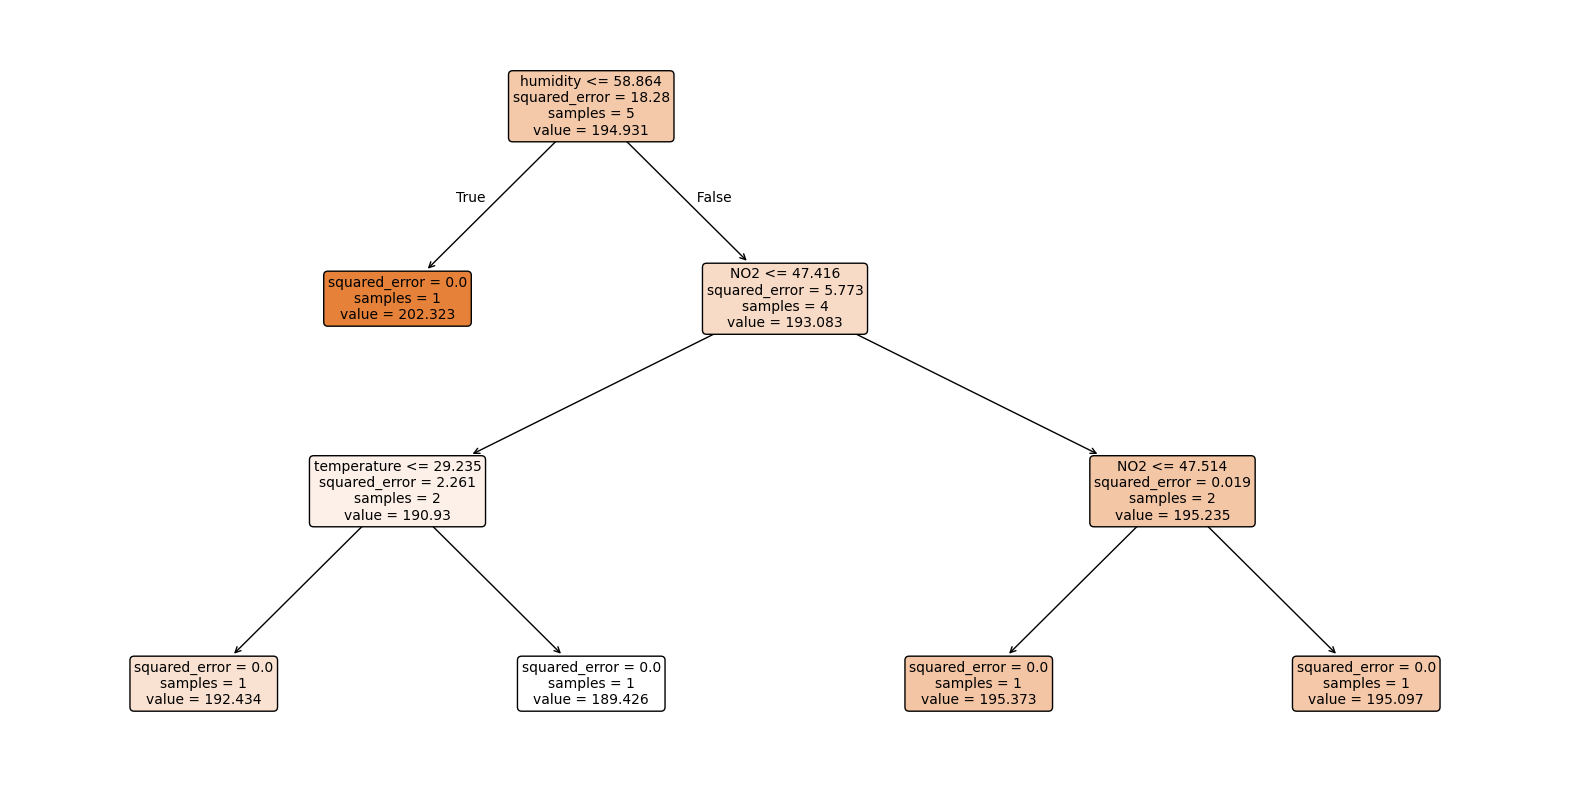

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    decision_tree, 
    feature_names=train_x.columns, 
    filled=True,       # color nodes by predicted value
    rounded=True,      # round node boxes
    fontsize=10
)
plt.show()


### 'Support Vector Machines

In [37]:
# linear_svc = LinearSVC()
# linear_svc.fit(train_x,train_y)

# Y_pred3 = linear_svc.predict(test_x)

# acc_linear_svc = round(linear_svc.score(train_x,train_y) * 100, 2)
# acc_linear_svcP = round(linear_svc.score(test_x,test_y) * 100, 2)
# Y_pred3  
from sklearn.svm import LinearSVC
from sklearn.preprocessing import KBinsDiscretizer

# 1️⃣ Discretize AQI into 5 categories (or adjust number of bins)
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
train_y_cat = kbins.fit_transform(train_y.values.reshape(-1,1)).astype(int).ravel()
test_y_cat = kbins.transform(test_y.values.reshape(-1,1)).astype(int).ravel()

# 2️⃣ Train LinearSVC
linear_svc = LinearSVC(max_iter=5000, random_state=42)
linear_svc.fit(train_x, train_y_cat)

# 3️⃣ Predict
Y_pred3 = linear_svc.predict(test_x)

# 4️⃣ Accuracy
acc_linear_svc_train = round(linear_svc.score(train_x, train_y_cat) * 100, 2)
acc_linear_svc_test = round(linear_svc.score(test_x, test_y_cat) * 100, 2)

print("Train Accuracy:", acc_linear_svc_train)
print("Test Accuracy:", acc_linear_svc_test)
print("Predictions:", Y_pred3)


Train Accuracy: 100.0
Test Accuracy: 0.0
Predictions: [1 1 1]


c:\Users\LENOVO\Downloads\ML-and-IoT-Based-Complete-Air-pollution-monitoring-and-forecasting-System-main\.venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### RESULT

In [41]:
import pandas as pd

# 1️⃣ Create results DataFrame from the existing model scores
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Train_Score': [acc_linear_svc_train, acc_knn, acc_log_train, 
                    round(random_forest.score(train_x, train_y)*100,2), acc_decision_tree],
    'Test_Score': [acc_linear_svc_test, acc_knnP, acc_log_test, 
                   round(random_forest.score(test_x, test_y)*100,2), acc_decision_treeP]
})

# 2️⃣ Sort by Test_Score descending and set Model as index
result_df = results.sort_values(by='Test_Score', ascending=False)
result_df = result_df.set_index('Model')

# 3️⃣ Display results
result_df


,Train_Score,Test_Score
Model,,
Decision Tree,100.00,33.33
Support Vector Machines,100.00,0.00
KNN,40.00,0.00
Logistic Regression,100.00,0.00
Random Forest,87.85,-366.12


### Evaluation

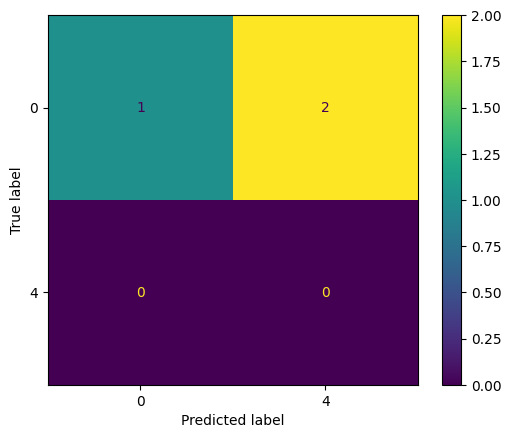

In [50]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import ConfusionMatrixDisplay

# 1️⃣ Discretize AQI into 5 categories for classification
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
train_y_cat = kbins.fit_transform(train_y.values.reshape(-1, 1)).astype(int).ravel()
test_y_cat = kbins.transform(test_y.values.reshape(-1, 1)).astype(int).ravel()

# 2️⃣ Train Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(train_x, train_y_cat)

# 3️⃣ Predict
y_pred_tree = decision_tree.predict(test_x)

# 4️⃣ Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(test_y_cat, y_pred_tree)


In [12]:
# Support Vector Machines

#plot_confusion_matrix(linear_svc,test_x,test_y)

In [13]:
# KNN

#plot_confusion_matrix(knn,test_x,test_y)

In [51]:
rmse = np.sqrt(mean_squared_error(p, test_y))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 16.299


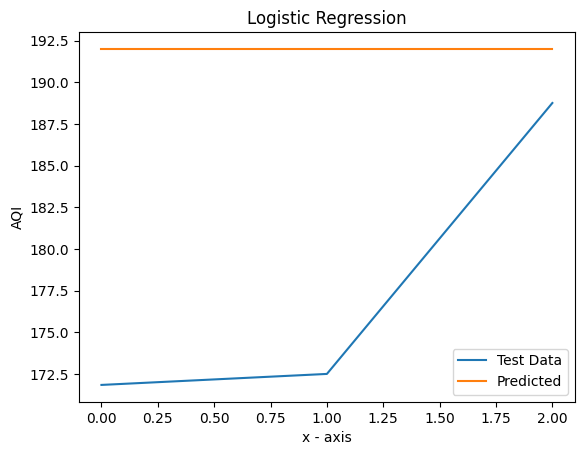

In [52]:
# Logistic Regression  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), p,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Logistic Regression')
plt.legend()
plt.show() 

In [53]:
rmse1 = np.sqrt(mean_squared_error(Y_pred, test_y))
print('Test RMSE: %.3f' % rmse1)

Test RMSE: 16.807


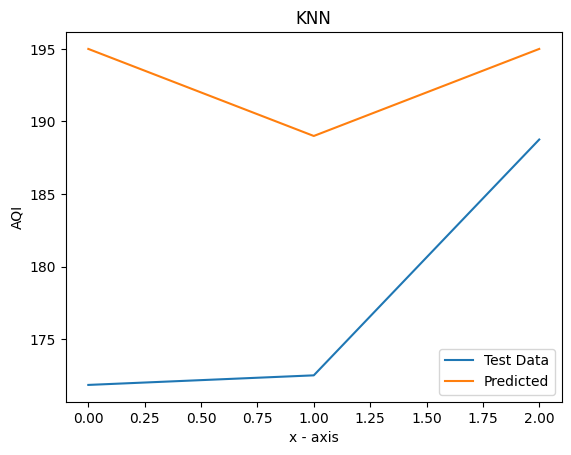

In [54]:
# KNN  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('KNN')
plt.legend()
plt.show() 

In [19]:
rmse2 = np.sqrt(mean_squared_error(Y_pred3, test_y))
print('Test RMSE: %.3f' % rmse2)

Test RMSE: 77.950


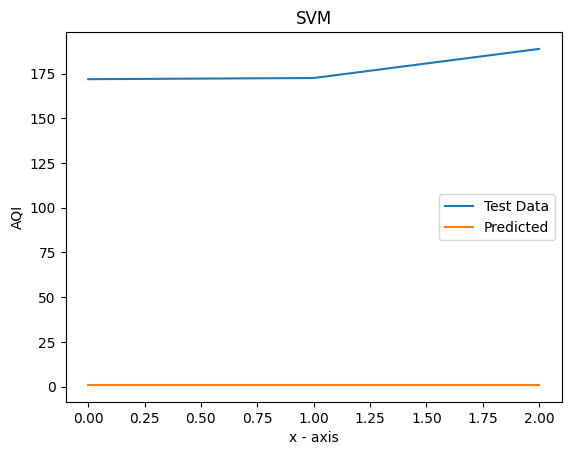

In [55]:
# SVM  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred3,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('SVM')
plt.legend()
plt.show() 

In [21]:
rmse3 = np.sqrt(mean_squared_error(Y_pred2, test_y))
print('Test RMSE: %.3f' % rmse3)

Test RMSE: 60.922


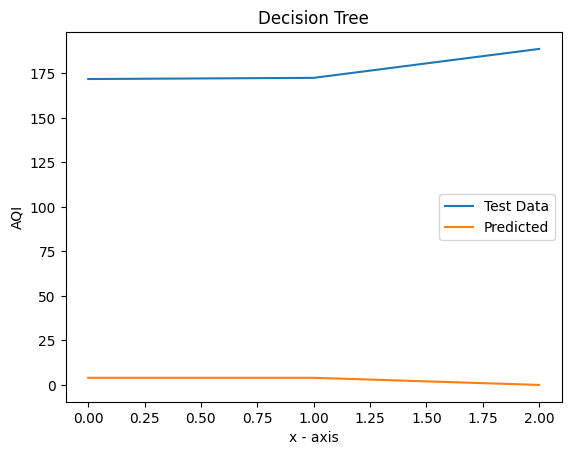

In [56]:
# Dession Tree  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred2,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Decision Tree')
plt.legend()
plt.show() 

In [57]:
rmse4 = np.sqrt(mean_squared_error(Y_prediction, test_y))
print('Test RMSE: %.3f' % rmse4)

Test RMSE: 16.888


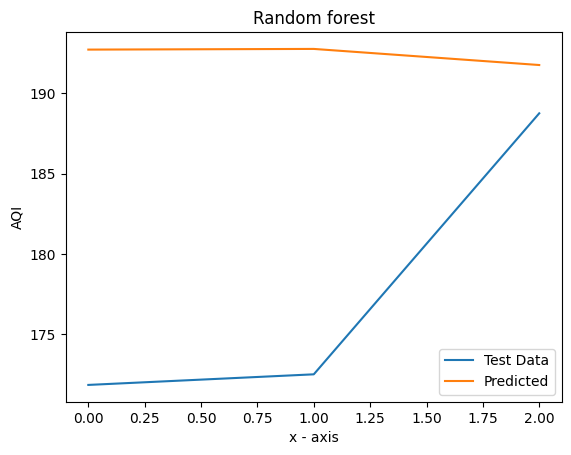

In [58]:
# Random Forest 
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_prediction,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Random forest')
plt.legend()
plt.show() 

In [59]:
# Serialize mlp_nn object into a file called mlp_nn.pkg on disk using pickle
import pickle
with open('decisionTree.pkl', 'wb') as handle:
    pickle.dump(decision_tree, handle, pickle.HIGHEST_PROTOCOL)
    

In [60]:
# de-serialize mlp_nn.pkl file into an object called mlp_nn using pickle
with open('decisionTree.pkl', 'rb') as handle:
    aqiModel = pickle.load(handle) 

In [61]:
test_x

,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,temperature,humidity,altitude
datetime,,,,,,,,,,
2020-01-07 02:00:00,165.248731,130.873096,44.944162,8.253807,16.558376,50.385787,24.258883,29.370558,60.873096,263.583756
2020-01-07 03:00:00,165.898477,130.817259,45.101523,8.269036,16.664975,50.213198,26.588832,29.604061,59.015228,254.472081
2020-01-07 12:00:00,181.751269,145.644670,47.350254,8.517766,16.837563,54.436548,24.928934,29.324873,60.659898,267.629442
